In [6]:
# 0. import the needed packages
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [7]:
# 1. Read the data points
my_data = pd.read_csv('Simple_data_points_for_PNN.csv', sep=';',header=0)
cleaned_data = np.array([ my_data['Feature 1'].tolist(),my_data['Feature 2'].tolist()]).T

print(my_data)
print(cleaned_data)

   Class  Feature 1  Feature 2
0      1        0.5        0.9
1      1        0.2        0.7
2      2        0.8        0.8
3      2        0.4        0.5
4      3        0.8        0.5
5      3        0.6        0.3
6      3        0.3        0.2
[[0.5 0.9]
 [0.2 0.7]
 [0.8 0.8]
 [0.4 0.5]
 [0.8 0.5]
 [0.6 0.3]
 [0.3 0.2]]


In [8]:
# 2. Declare the needed variable 
groups = my_data.groupby('Class')
number_of_classes = len(groups)  # Here we have 3 different classes
dictionary_of_sum = {}
numrber_of_features  = 2 # We have feature 1 and feature 2 



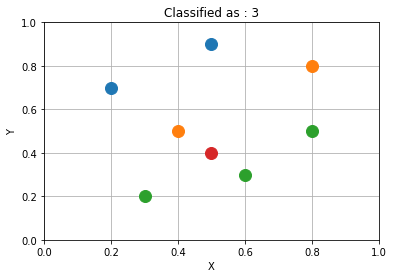

In [32]:
# **INPUT LAYER OF THE PNN **
increament_current_row_in_matrix = 0
sigma = 1
# 3. Define the point that we wish to classifiy - Clearly it is Red 
point_want_to_classify = [0.5,0.4]

# 4. Loop via number of classes 
for k in range(1,number_of_classes+1):

	# 4.1 Initiate the sume to zero 
	dictionary_of_sum[k] = 0
	number_of_data_point_from_class_k = len(groups.get_group(k))

	# ** PATTERN LAYER OF PNN **
	# 5. Loop via the number of training example in class i 
	# 5.1 - Declare a temporary variable to hold the sum of gaussian distribution sum
	temp_summnation = 0.0

	# 6. Loop via number of points in the class - NUMBER OF POINTS IN THE CLASS!
	for i in range(1,number_of_data_point_from_class_k+1):

		# 6.1 - Implementation of getting Gaussians 
		tempx = (point_want_to_classify[0] - cleaned_data[increament_current_row_in_matrix][0]) * (point_want_to_classify[0] - cleaned_data[increament_current_row_in_matrix][0]) 
		tempy = (point_want_to_classify[1] - cleaned_data[increament_current_row_in_matrix][1]) * (point_want_to_classify[1] - cleaned_data[increament_current_row_in_matrix][1]) 
		temp_sum = -1 * (tempx + tempy)
		temp_sum = temp_sum/( 2 * np.power(sigma,2) )

		# 6.2 - Implementation of Sum of Gaussians
		temp_summnation = temp_summnation + temp_sum

		# 6.3 - Increamenting the row of the matrix to get the next data point
		increament_current_row_in_matrix  = increament_current_row_in_matrix + 1

	# 7. Finally - For K class - the Probability of current data point belonging to that class
	dictionary_of_sum[k]  = temp_summnation 

# 8. Get the classified class 
classified_class = str( max(dictionary_of_sum, key=dictionary_of_sum.get) )

# 9. Group the data by class 
groups = my_data.groupby('Class')

# Drawing the graph
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Feature 1'], group['Feature 2'], marker='o', linestyle='', ms=12, label=name)

# Draw the unclassified data point 
ax.plot(point_want_to_classify[0], point_want_to_classify[1], marker='o', linestyle='', ms=12)

# Setting the limit of x and y axis
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.title('Classified as : ' + str(classified_class) )
plt.xlabel('X')
plt.ylabel('Y')

# Giving a grid and show the plot
plt.grid()
plt.show()

# ---- END OF THE CODE ------